In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt

import pyswarms as ps
from pyswarms.utils.plotters import (plot_cost_history, plot_contour, plot_surface)

In [2]:
def cost_function(I):
    U=10
    R=100
    I_s=9.4e-12
    v_t=25.85e-3
    
    c = abs(U - v_t * np.log(abs(I[:,0]/I_s)) - R * I[:,0])
    return c

In [13]:
%%timeit -r 3 -n 1000
#hyperparameters set-up
options = {
    "c1":.5,
    "c2":.3,
    "w":.3
}

#call instance of PSO
optimizer = ps.single.GlobalBestPSO(
    n_particles = 10,
    dimensions = 1,
    options = options
)

#perform optimization
cost, pos = optimizer.optimize(
    cost_function, 
    iters=30, 
    verbose=False
)

6.65 ms ± 102 µs per loop (mean ± std. dev. of 3 runs, 1,000 loops each)


In [14]:
#hyperparameters set-up
options = {
    "c1":.5,
    "c2":.3,
    "w":.3
}

#call instance of PSO
optimizer = ps.single.GlobalBestPSO(
    n_particles = 10,
    dimensions = 1,
    options = options
)

#perform optimization
cost, pos = optimizer.optimize(cost_function, iters=30)

2023-04-05 12:29:55,800 - pyswarms.single.global_best - INFO - Optimize for 30 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.3}
pyswarms.single.global_best: 100%|█████████████████████|30/30, best_cost=0.00215
2023-04-05 12:29:55,832 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.002151637233987813, best pos: [0.09402623]


In [15]:
print(pos[0])

0.09402622904246515


In [16]:
print(cost)

0.002151637233987813


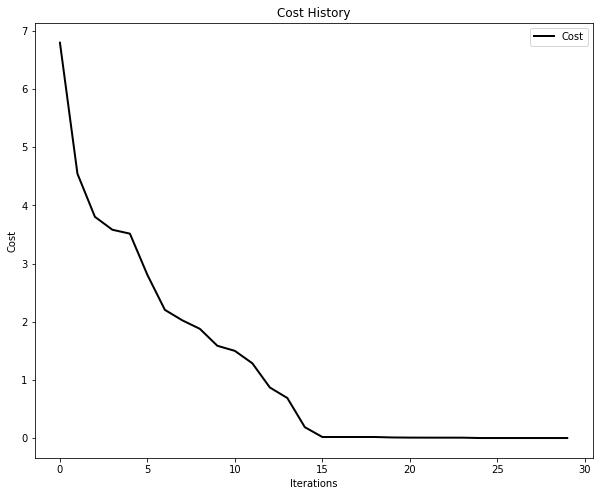

In [17]:
plot_cost_history(cost_history=optimizer.cost_history)
plt.show()

Text(0, 0.5, 'Cost')

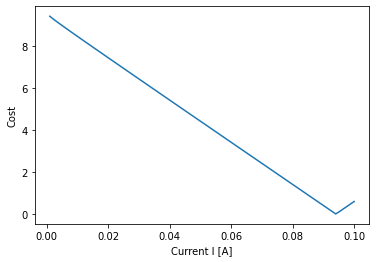

In [8]:
x = np.linspace(0.001, 0.1, 100).reshape(100,1)
y = cost_function(x)

plt.plot(x,y)
plt.xlabel("Current I [A]")
plt.ylabel("Cost")

In [9]:
from scipy.optimize import fsolve

In [12]:
%%timeit -r 3 -n 1000
c = lambda I: abs(10 - 25.85e-3 * np.log(abs(I / 9.4e-12)) - 100 * I)

initial_guess = 0.09

current_I = fsolve(func=c, x0=initial_guess)

#print(current_I[0])

80.1 µs ± 3.21 µs per loop (mean ± std. dev. of 3 runs, 1,000 loops each)


In [23]:
c = lambda I: abs(10 - 25.85e-3 * np.log(abs(I / 9.4e-12)) - 100 * I)

initial_guess = .09

current_I = fsolve(func=c, x0=initial_guess)

print(current_I[0])

0.09404768643017938
